In [ ]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print("train")
print("x", x_train.shape)
print("y", y_train.shape)

print("test")
print("x", x_test.shape)
print("y", y_test.shape)

train
x (60000, 28, 28)
y (60000,)
test
x (10000, 28, 28)
y (10000,)


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

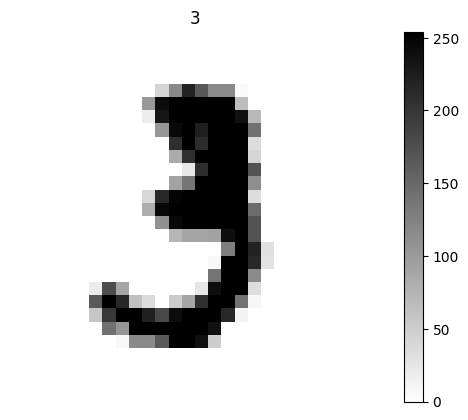

In [6]:
from matplotlib import pyplot as plt
number = 10 

plt.imshow(x_train[number,:,:], cmap="gray_r")
plt.title(y_train[number])
plt.colorbar()
plt.axis("off")

on normalise!!!!!!!!!!!!!!!!!!!!

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

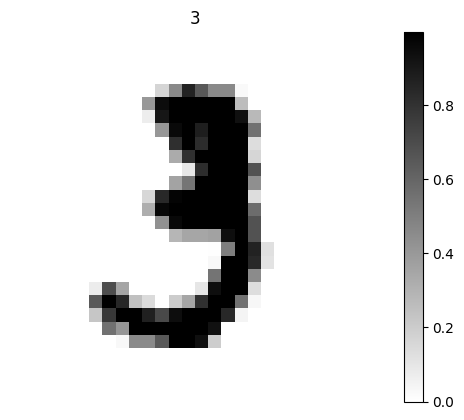

In [7]:
x_train = x_train / 255.0
x_test = x_test / 255.0

plt.imshow(x_train[number,:,:], cmap="gray_r")
plt.title(y_train[number])
plt.colorbar()
plt.axis("off")

(array([5923.,    0., 6742.,    0., 5958.,    0., 6131.,    0., 5842.,
           0., 5421.,    0., 5918.,    0., 6265.,    0., 5851.,    0.,
        5949.]),
 array([0.        , 0.47368421, 0.94736842, 1.42105263, 1.89473684,
        2.36842105, 2.84210526, 3.31578947, 3.78947368, 4.26315789,
        4.73684211, 5.21052632, 5.68421053, 6.15789474, 6.63157895,
        7.10526316, 7.57894737, 8.05263158, 8.52631579, 9.        ]),
 <BarContainer object of 19 artists>)

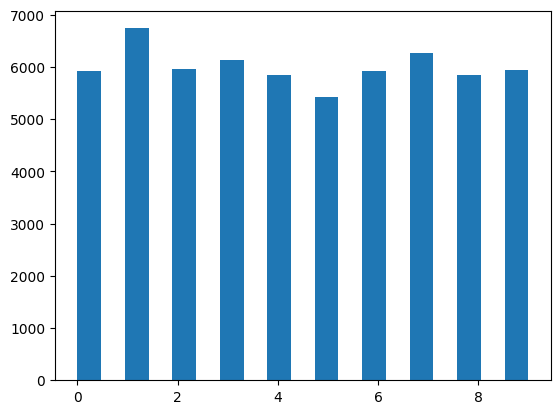

In [12]:
plt.hist(y_train, bins=19)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np 

x2_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1]*x_train.shape[2]))
x2_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1]*x_test.shape[2]))


In [ ]:
model = LogisticRegression(max_iter=200)
model.fit(x2_train, y_train)

y_pred = model.predict(x2_test)


c:\Users\anton\Downloads\keras_test\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


'              precision    recall  f1-score   support\n\n           0       0.95      0.98      0.97       980\n           1       0.96      0.98      0.97      1135\n           2       0.93      0.90      0.92      1032\n           3       0.91      0.91      0.91      1010\n           4       0.94      0.94      0.94       982\n           5       0.89      0.87      0.88       892\n           6       0.94      0.95      0.95       958\n           7       0.93      0.92      0.93      1028\n           8       0.88      0.88      0.88       974\n           9       0.91      0.91      0.91      1009\n\n    accuracy                           0.93     10000\n   macro avg       0.93      0.93      0.93     10000\nweighted avg       0.93      0.93      0.93     10000\n'

In [23]:

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.92      1032
           3       0.91      0.91      0.91      1010
           4       0.94      0.94      0.94       982
           5       0.89      0.87      0.88       892
           6       0.94      0.95      0.95       958
           7       0.93      0.92      0.93      1028
           8       0.88      0.88      0.88       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



In [24]:
28*28

784

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 

model = Sequential()
# input + 1ere couche caché
model.add(Dense(units=128, activation="relu", input_dim=784))
# model.add(Dense(units=64, activation="relu"))
# classifieur on cherche 10 classes 
model.add(Dense(units=10, activation="softmax"))


c:\Users\anton\Downloads\keras_test\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [75]:
model.compile(optimizer="adam", 
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [76]:
history = model.fit(x2_train, y_train,
                    validation_data=(x2_test, y_test),
                    batch_size = 128,
                    epochs=50)

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8356 - loss: 0.5974 - val_accuracy: 0.9397 - val_loss: 0.2031
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9480 - loss: 0.1845 - val_accuracy: 0.9579 - val_loss: 0.1401
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9648 - loss: 0.1241 - val_accuracy: 0.9687 - val_loss: 0.1078
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9733 - loss: 0.0927 - val_accuracy: 0.9732 - val_loss: 0.0937
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9780 - loss: 0.0732 - val_accuracy: 0.9715 - val_loss: 0.0872
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9847 - loss: 0.0558 - val_accuracy: 0.9744 - val_loss: 0.0836
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9861 - loss: 0.0489 - val_accuracy: 0.9769 - val_loss: 0.0755
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9887 - loss: 0.0414 - val_accuracy: 0.

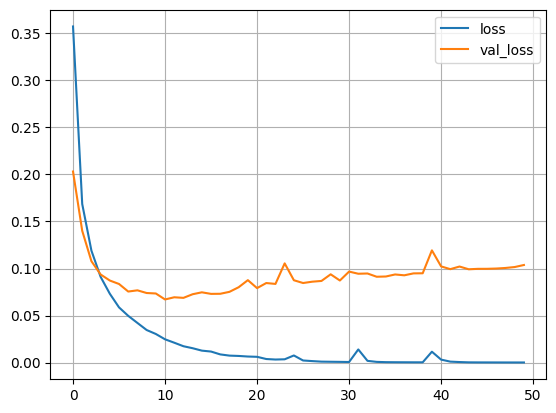

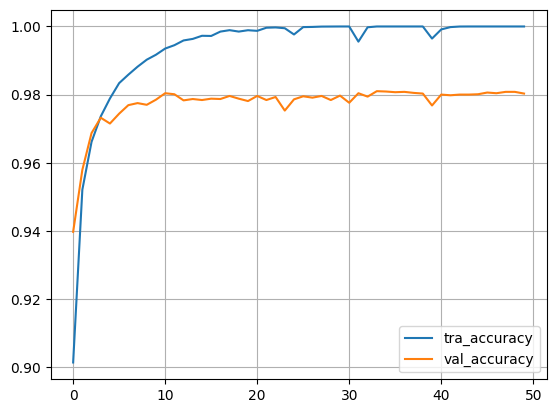

In [77]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.grid()
plt.legend()

plt.figure()
plt.plot(history.history["accuracy"], label="tra_accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.grid()
plt.legend()

In [78]:
y_pred2 = model.predict(x2_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step


In [79]:
y_pred2.shape

(10000, 10)

Text(0.5, 1.0, '7')

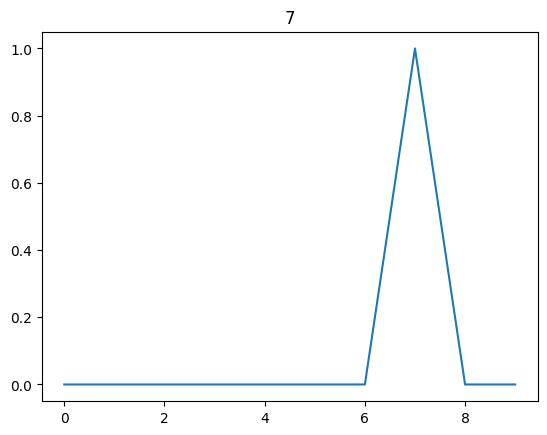

In [80]:
number = 0
plt.plot(y_pred2[number])
plt.title(y_test[number])

In [81]:
argmax_y_pred = np.argmax(y_pred2, axis=-1)
argmax_y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [82]:
print("Reg Log")
print(report)
print("rnn")
print(classification_report(y_test,argmax_y_pred))

Reg Log
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.92      1032
           3       0.91      0.91      0.91      1010
           4       0.94      0.94      0.94       982
           5       0.89      0.87      0.88       892
           6       0.94      0.95      0.95       958
           7       0.93      0.92      0.93      1028
           8       0.88      0.88      0.88       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000

rnn
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3

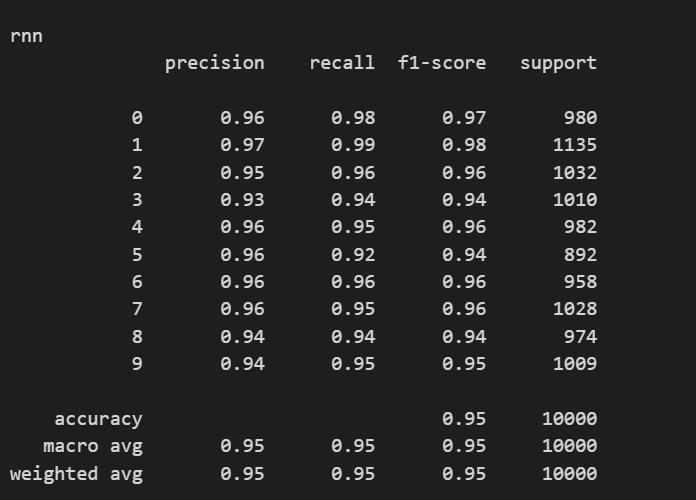

Autre couche

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 

model = Sequential()
# input + 1ere couche caché
model.add(Dense(units=128, activation="relu", input_dim=784))
# model.add(Dense(units=64, activation="relu"))
# classifieur on cherche 10 classes 
model.add(Dense(units=10, activation="softmax"))

model.compile(optimizer="adam", 
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(x2_train, y_train,
                    validation_data=(x2_test, y_test),
                    batch_size = 128,
                    epochs=50)

y_pred2 = model.predict(x2_test)

In [106]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense 

class MonModelClassif:
    def __init__(self, img_dim, nb_units, activation, nb_classe):
        """ initialise l'instance de la classe:
            1 - les attributs
            2 - Création du réseau de neurones
            3 - Compilation du réseau """
        # attributs de ma classe
        self.img_dim = img_dim # taille en x et y (size_x, size_y)
        self.nb_units = nb_units
        self.activation = activation
        self.nb_classe = nb_classe
        # Création du réseau de neurones
        self.MonReseau_creation()
        # Compilation du réseau
        self.MonReseau_compile()

    def MonReseau_creation(self):
        model = Sequential()
        # INPUT LAYER
        model.add(Input(self.img_dim))
        # HIDDEN LAYERS
        # le flatten va applatir l'image (28*28 -> 784*1)        
        # mais il a besoin de connaitre la taille de l'input qui est 28*28
        model.add(Flatten())
        model.add(Dense(units=self.nb_units,
                        activation=self.activation))
        # OUTPUT LAYER
        model.add(Dense(units=self.nb_classe, activation="softmax"))
        self.model = model

    def MonReseau_compile(self):
        self.model.compile(optimizer="adam", 
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

    def train_model(self, x_train, y_train, x_test, y_test, batch_size=128, epochs=50, verbose=True):
        self.history = self.model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=verbose)
        
    def predire_proba(self, data):
        return self.model.predict(data)
    
    def predire(self, data):
        return np.argmax(self.model.predict(data), axis=-1)
    
    def plot_loss(self):
        plt.figure()
        plt.plot(self.history.history["loss"], label="loss")
        plt.plot(self.history.history["val_loss"], label="val_loss")
        plt.grid()
        plt.legend()

    def plot_metrics(self):
        plt.figure()
        plt.plot(self.history.history["accuracy"], label="tra_accuracy")
        plt.plot(self.history.history["val_accuracy"], label="val_accuracy")
        plt.grid()
        plt.legend()

In [107]:
# creation d'un objet, qui est une instance de la classe MonModel
model = MonModelClassif((28,28), 32, "relu", 10) # instanciation de la classe bahhh il faut que ça s'initialise


In [108]:
model.train_model(x_train, y_train, x_test, y_test, verbose=False)

In [109]:
ypred_classe = model.predire(x_test)

print(classification_report(y_test, ypred_classe))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.97      0.95      0.96      1032
           3       0.95      0.98      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.96      0.96       892
           6       0.97      0.97      0.97       958
           7       0.94      0.97      0.96      1028
           8       0.96      0.94      0.95       974
           9       0.97      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



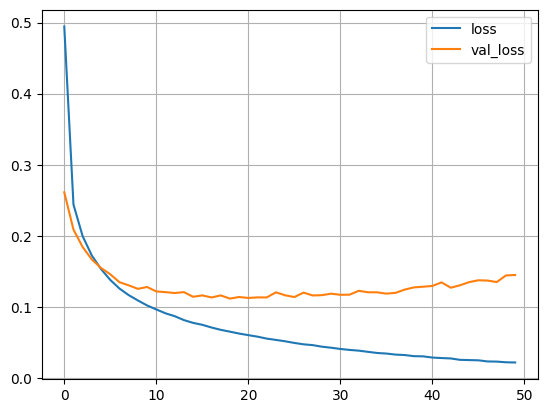

In [110]:
model.plot_loss()

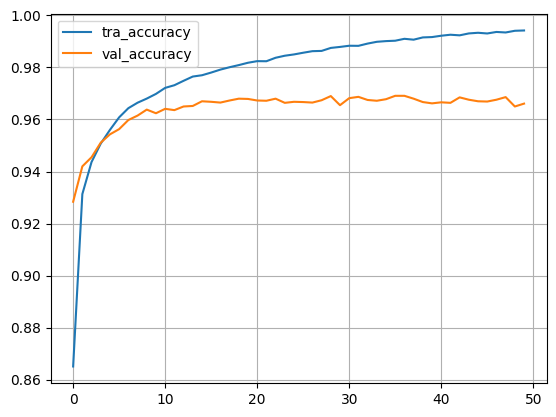

In [111]:
model.plot_metrics()